In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

--------
# Visualización de Datos y Detección de *Outliers*

El *dataset* se extrajo de [__*Kaggle*__](https://www.kaggle.com/) y almacena todas las características de casas vendidas en Iowa.

In [2]:
train = pd.read_csv('Datos/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Descripción de algunas Variables: 

* SalePrice: precio al que se vendió la casa.
* OverallQual: condición de la casa (del 1 al 10)
* GrLvArea: área de zonas verdes y sala.
* GarageCars: número de coches que caben en el garage.
* GarageArea: área total del garage.
* 1stFlrSF: área total del primer piso.
* FullBath: número de baños completos.
* TotRmsAbvGrd: número de cuartos.
* YearBuilt: año de construcción

## Análisis Estadístico de la Variable SalePrice

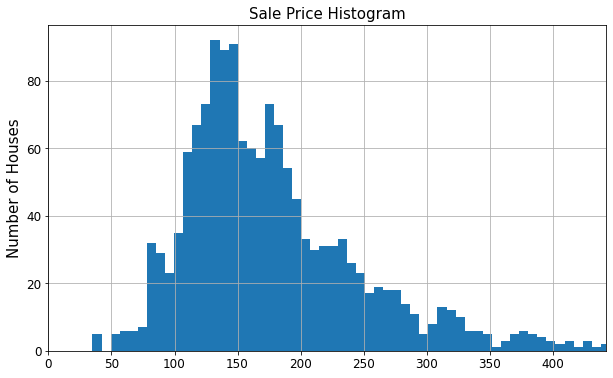

In [4]:
plt.figure(figsize = (10,6))
(train.SalePrice/1000).hist(bins=100)
plt.title('Sale Price Histogram', fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0 , (train.SalePrice/1000).quantile(0.99));

In [5]:
(train.SalePrice/1000).describe()

count    1460.000000
mean      180.921196
std        79.442503
min        34.900000
25%       129.975000
50%       163.000000
75%       214.000000
max       755.000000
Name: SalePrice, dtype: float64

## Análisis Exploratorio de las Variables Independientes

### Living Area

### MatplotLib

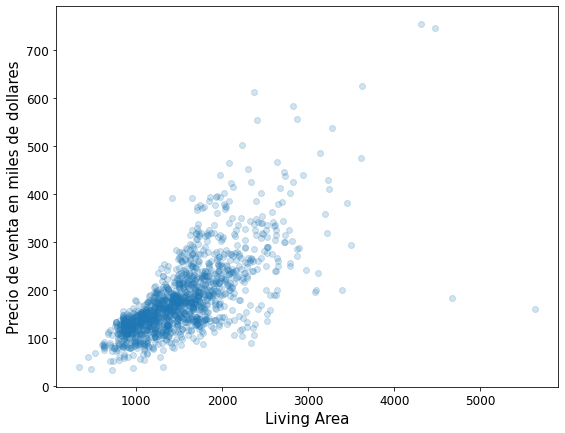

In [6]:
plt.figure(figsize=(9,7))
plt.scatter(train.GrLivArea, train.SalePrice/1000, alpha=0.2)
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

### seaborn.

In [7]:
import seaborn as sbn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


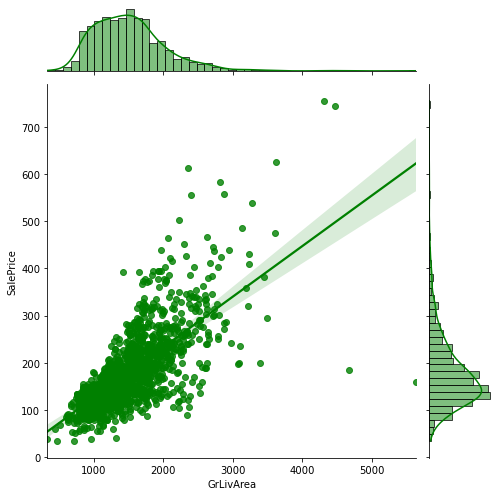

In [8]:
sbn.jointplot(train.GrLivArea, (train.SalePrice/1000), kind = 'reg', color = 'g', size = 7)
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

A medida que *Living Area* aumenta obviamente sube el precio de la casa. En la gráfica vemos 2 *outliers* que en un living area de más de 4000 unidades cuadradas tienen un precio demasiado bajo. Vamos a remover estos dos puntos:

In [9]:
train[(train['GrLivArea']> 4000) & (train['SalePrice'] < 300000)].index

Int64Index([523, 1298], dtype='int64')

In [10]:
train = train.drop(train[(train['GrLivArea']> 4000) 
           & (train['SalePrice'] < 300000)].index).reset_index(drop = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


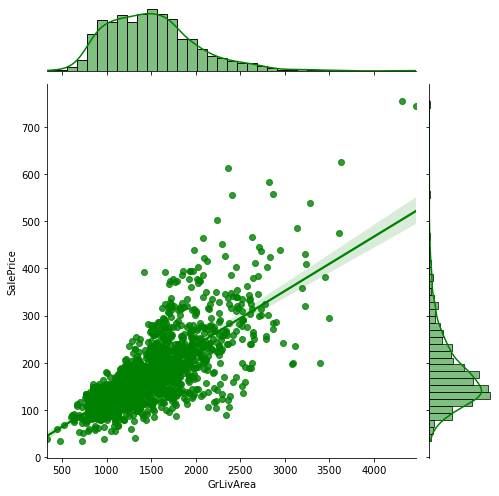

In [11]:
sbn.jointplot(train.GrLivArea, (train.SalePrice/1000), kind = 'reg', color = 'g', size = 7)
plt.xlabel('Living Area', fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

### OverallQual

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


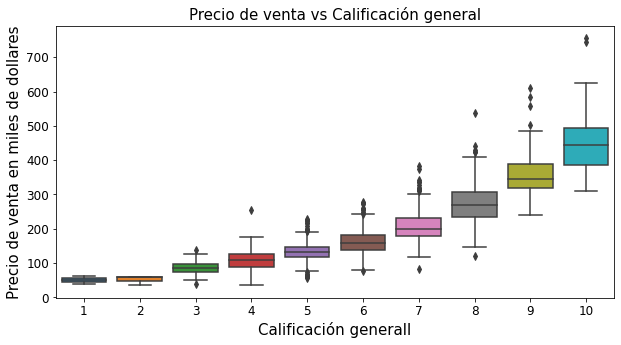

In [12]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.OverallQual,(train.SalePrice/1000))
plt.title('Precio de venta vs Calificación general', fontsize = 15)
plt.xlabel('Calificación generall',fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

A medida que la calidad de la casa aumenta, también lo hace su precio.

### Analisis por habitaciones totales 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


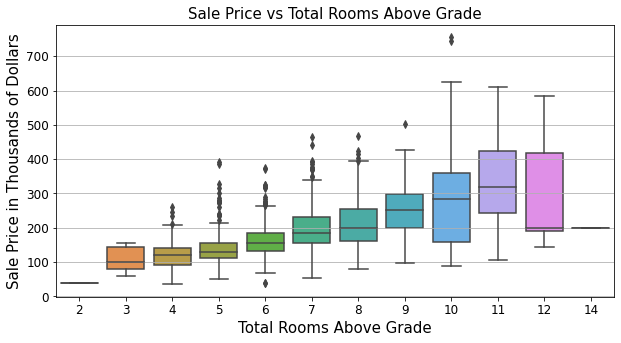

In [13]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.TotRmsAbvGrd, (train.SalePrice/1000))
plt.title('Sale Price vs Total Rooms Above Grade', fontsize = 15)
plt.xlabel('Total Rooms Above Grade',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

Parece que tenemos una casa con 14 cuartos que es ridículamente barata. Quitemos este outlier:

In [14]:
train = train.drop(train[train['TotRmsAbvGrd'] == 14].index).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


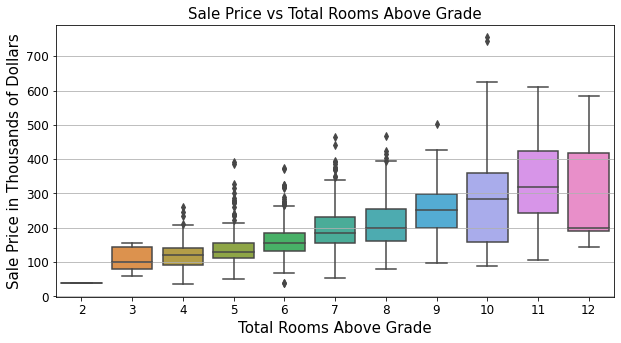

In [15]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.TotRmsAbvGrd, (train.SalePrice/1000))
plt.title('Sale Price vs Total Rooms Above Grade', fontsize = 15)
plt.xlabel('Total Rooms Above Grade',fontsize = 15)
plt.ylabel('Sale Price in Thousands of Dollars',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

### 1st Floor Surface

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


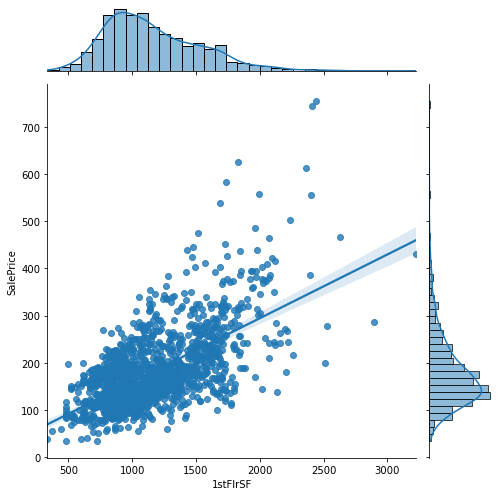

In [16]:
sbn.jointplot(train['1stFlrSF'], (train.SalePrice/1000), kind = 'reg', size = 7)
plt.xlabel('Garage Area', fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

### Baño completo

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


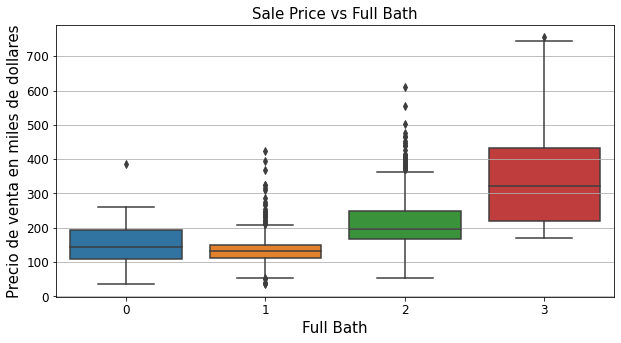

In [17]:
plt.figure(figsize = (10,5))
sbn.boxplot(train.FullBath, (train.SalePrice/1000))
plt.title('Sale Price vs Full Bath', fontsize = 15)
plt.xlabel('Full Bath',fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = 'y')

Pese a que hay un pequeño extraño entre las casas con cero y un baño, no considero pertinente cambiar nada aquí tampoco.

### Año de construcción

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


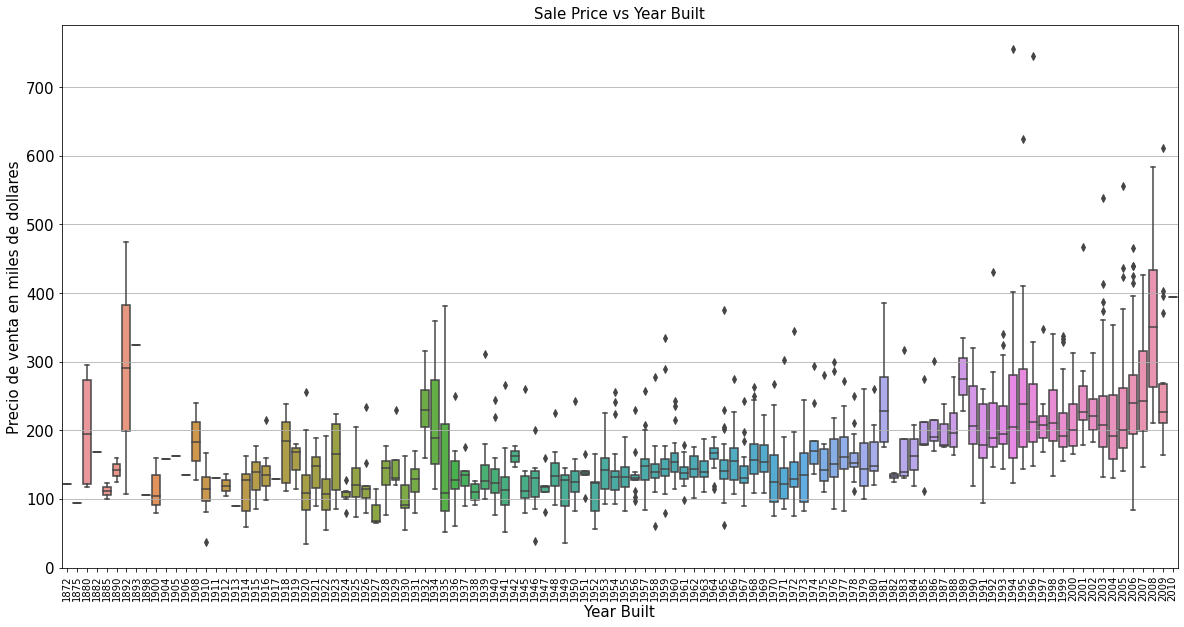

In [18]:
plt.figure(figsize = (20,10))
sbn.boxplot(train.YearBuilt, (train.SalePrice/1000))
plt.title('Sale Price vs Year Built', fontsize = 15)
plt.xlabel('Year Built',fontsize = 15)
plt.ylabel('Precio de venta en miles de dollares',fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 15)
plt.grid(axis = 'y')

No contamos con información para discriminar si hay un outlier aquí, el precio de una casa puede aumentar o disminuir mientras pasan los años, pero también podría tener que ver el año en qué se vendió y en qué situación económica se encontraba el país en ese año. 
Damos por terminado el análisis de las variables más correlacionadas con SalePrice.

## ¿En qué barrio había más casas?

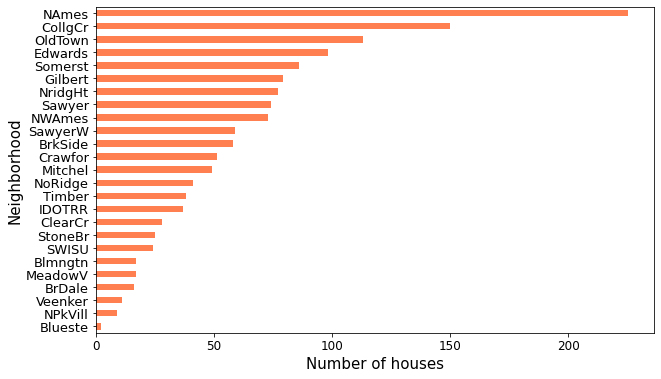

In [19]:
plt.figure(figsize=(10,6))
train.groupby('Neighborhood').SalePrice.count().sort_values(
    ascending = True).plot.barh(color='coral')
plt.xlabel('Number of houses', fontsize = 15)
plt.ylabel('Neighborhood',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 13);

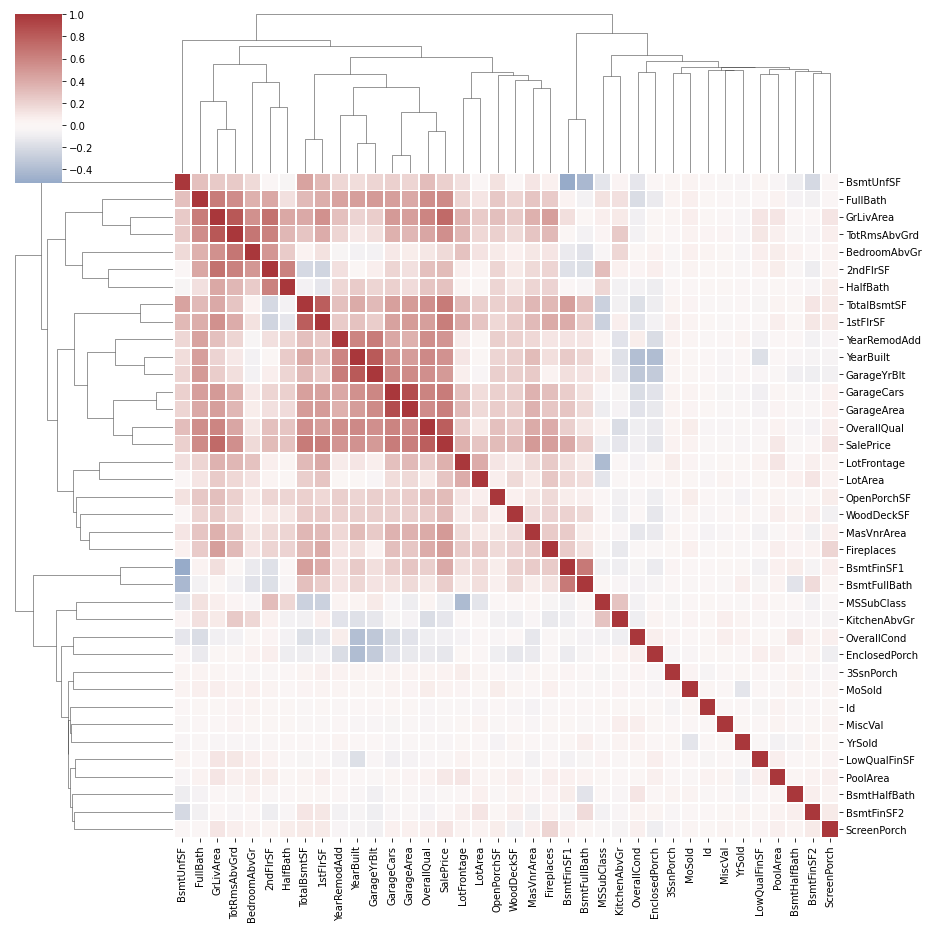

In [20]:
sbn.clustermap(train.corr(), center=0, cmap="vlag",
#                row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));

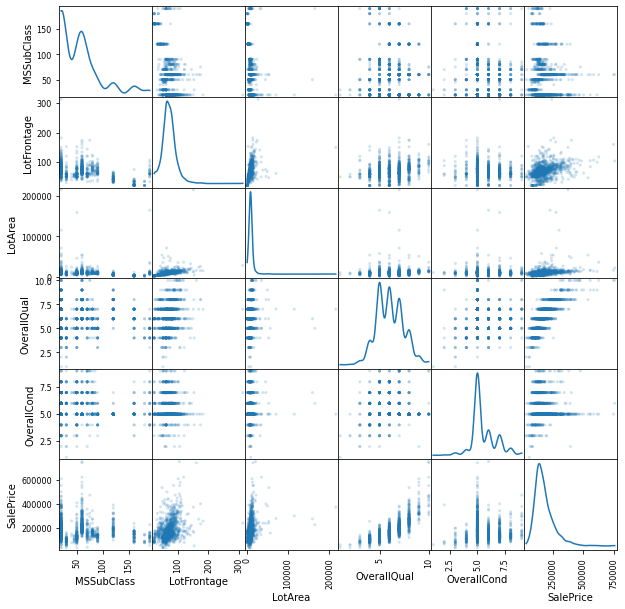

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(train.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,-1]],
               figsize=(10,10),
              alpha=0.2,
               diagonal='kde');